# Example Notebook demonstarting some basic functionality

### Working with legacy StatSTEMInput data

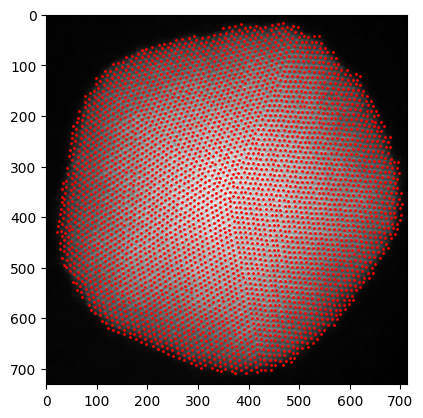

In [18]:
import qem
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter
# file = '/home/zzhang/OneDrive/code/qem/data/2016-05_efficientFitProgram/outputFitProgram_Pt_100_1atoms.mat'
file ='/home/zzhang/OneDrive/code/qem/data/testFitProgram/output_fivefoldsymmetry2015_121416_2_bak.mat'
# file ='/home/zzhang/OneDrive/code/qem/data/testFitProgram/outputStatSTEM_Right_330_RevSTEM90_STEMdataset_802x814_3_final_60_rotated.mat'
# file ='/home/zzhang/OneDrive/code/qem/data/testFitProgram/StatSTEM_300C_O2_after_O2_and_H2_flow_1_1_conv_1_rotated.mat'
# file = '/home/zzhang/OneDrive/code/qem/data/testFitProgram/outputGMMrodEmeric_100_final.mat'
# file = '/home/zzhang/OneDrive/code/qem/data/testFitProgram/outputStatSTEM_Right_RT_RevSTEM90_STEMdataset_778x842_3_final_64_rotated.mat'
legacyStatSTEM = qem.io.read_legacyInputStatSTEM(file)
inputStatSTEM = legacyStatSTEM['input']
outputStatSTEM = legacyStatSTEM['output']
# inputStatSTEM = legacyStatSTEM
# outputStatSTEM = legacyStatSTEM
image = inputStatSTEM['obs']
dx = inputStatSTEM['dx']


image = gaussian_filter(image, 2)

input_coordinates = inputStatSTEM['coordinates']
# output_coordinates = input_coordinates.copy()
# output_coordinates[:,0] = outputStatSTEM['BetaX']/dx 
# output_coordinates[:,1] = outputStatSTEM['BetaY']/dx

from qem.fitting import ImageModelFitting

model=ImageModelFitting(image, pixel_size=dx)

model.import_coordinates(coordinates=input_coordinates[:,[1,0]]/dx-1)
model.plot()

In [ ]:
params = model.init_params(gauss_ratio=0.9)
# save the initial parameters to a hdf5 file
import h5py
f = h5py.File('initial_params_5fold.h5','w')
for key in params.keys():
    f.create_dataset(key, data=params[key])
    # add dx to the hdf5 file
f.attrs['dx'] = dx
f.close()


NameError: name 'model' is not defined

In [23]:
%matplotlib qt5
model.find_peaks(atom_size=1.0, threshold_rel=0.15)

Updated peak locations.


array([[358., 359.],
       [331., 392.],
       [326., 351.],
       ...,
       [ 64., 198.],
       [ 20., 414.],
       [702., 441.]])

In [19]:
model.fit_background = True
model.model = 'gaussian'
model.fit(maxiter=1000, tol=1e-4, step_size = 1e-2, verbose=True)
# model.segment_and_fit(patch_size = 400,buffer_size =50, plot=True)

INFO: jaxopt.OptaxSolver: Iter: 1 Gradient Norm (stop. crit.): 149.63241577148438 Objective Value:6168.5966796875 
INFO: jaxopt.OptaxSolver: Iter: 2 Gradient Norm (stop. crit.): 149.85812377929688 Objective Value:6069.37744140625 
INFO: jaxopt.OptaxSolver: Iter: 3 Gradient Norm (stop. crit.): 150.04574584960938 Objective Value:5970.1083984375 
INFO: jaxopt.OptaxSolver: Iter: 4 Gradient Norm (stop. crit.): 150.21426391601562 Objective Value:5870.796875 
INFO: jaxopt.OptaxSolver: Iter: 5 Gradient Norm (stop. crit.): 150.36929321289062 Objective Value:5771.4404296875 
INFO: jaxopt.OptaxSolver: Iter: 6 Gradient Norm (stop. crit.): 150.4950714111328 Objective Value:5672.0576171875 
INFO: jaxopt.OptaxSolver: Iter: 7 Gradient Norm (stop. crit.): 150.5806427001953 Objective Value:5572.6591796875 
INFO: jaxopt.OptaxSolver: Iter: 8 Gradient Norm (stop. crit.): 150.6537628173828 Objective Value:5473.23828125 
INFO: jaxopt.OptaxSolver: Iter: 9 Gradient Norm (stop. crit.): 150.6963348388672 Objecti

In [7]:
from skimage.feature import peak_local_max
coord = peak_local_max(image=model.image - model.prediction,min_distance=5,threshold_rel=0.15, exclude_border = False)

In [27]:
coord = np.array([model.pos_x, model.pos_y]).T/dx
# coord = peak_local_max(image=model.image - model.prediction,min_distance=5,threshold_rel=0.6, exclude_border = False)
peaks = model.add_or_remove_peaks(coord,image=model.image - model.prediction,min_distance=5)
# model.coordinates = peaks
len(peaks)

Updated peak locations.


3555

In [13]:
outputStatSTEM['output'].keys()

dict_keys(['coordinates', 'rho', 'eta', 'zeta', 'model', 'volumes', 'lsq', 'newP', 'patch'])

In [32]:
outputStatSTEM.keys()

dict_keys(['ICL', 'AIC', 'GIC', 'AWE', 'BIC', 'CLC', 'AtomCounts', 'Volumes', 'coordinates', 'numberofAtoms', 'estimatedLocations', 'estimatedWidth', 'estimatedProportions', 'N', 'offset', 'estimatedDistributions'])

/tmp/ipykernel_427266/1234794906.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)


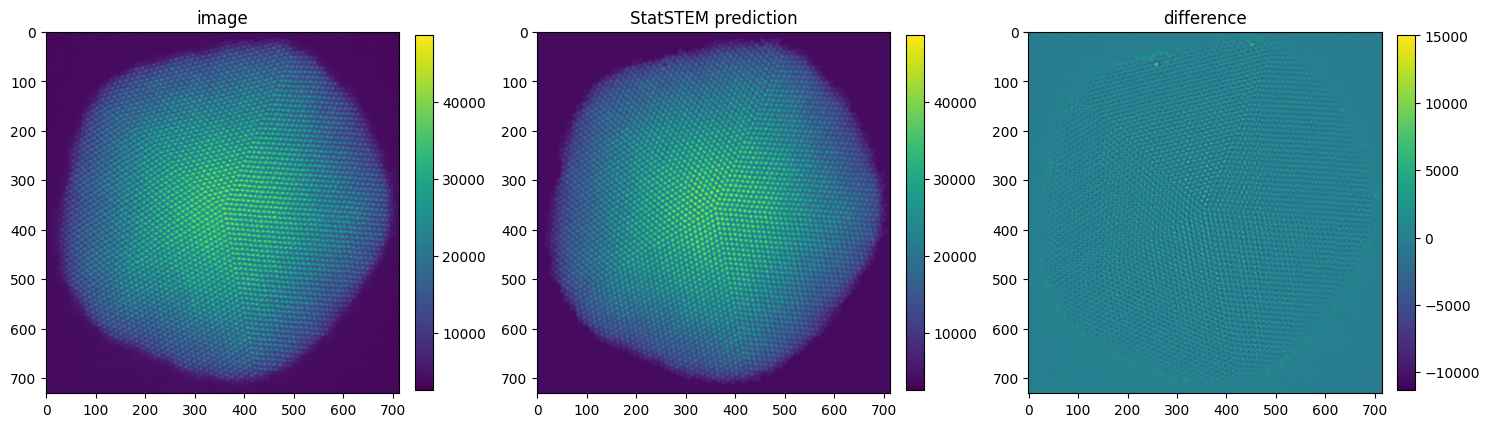

In [5]:
# outputStatSTEM=outputStatSTEM['output']
plt.subplots(figsize=(15,5))
plt.subplot(1,3,1)
image = inputStatSTEM['obs']
im = plt.imshow( image)
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.clim(image.min(),image.max())
plt.title('image')
plt.subplot(1,3,2)
im = plt.imshow( outputStatSTEM['model'])
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.clim(image.min(),image.max())
plt.title('StatSTEM prediction')
plt.subplot(1,3,3)
im = plt.imshow( image - outputStatSTEM['model'])
plt.colorbar(im,fraction=0.046, pad=0.04)
# plt.clim(-4000,4000)
plt.title('difference')
plt.tight_layout()

/tmp/ipykernel_427266/1375017968.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)


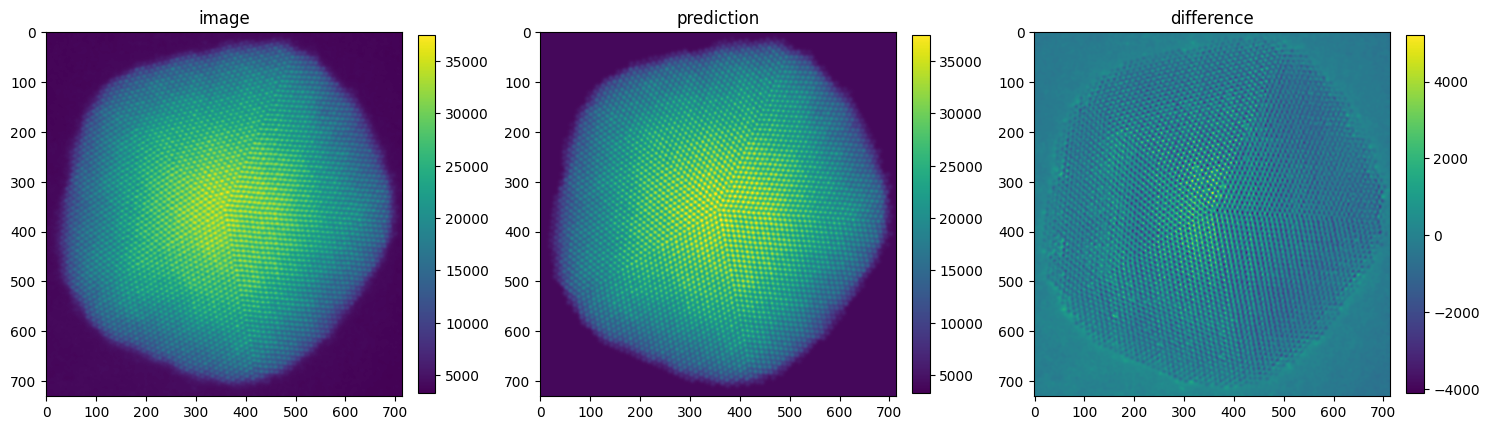

In [20]:
plt.subplots(figsize=(15,5))
plt.subplot(1,3,1)
im = plt.imshow( model.image)
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.clim(model.image.min(),model.image.max())
plt.title('image')
plt.subplot(1,3,2)
im = plt.imshow(model.prediction)
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.clim(model.image.min(),model.image.max())
plt.title('prediction')
plt.subplot(1,3,3)
im = plt.imshow( model.image - model.prediction)
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.title('difference')
plt.tight_layout()

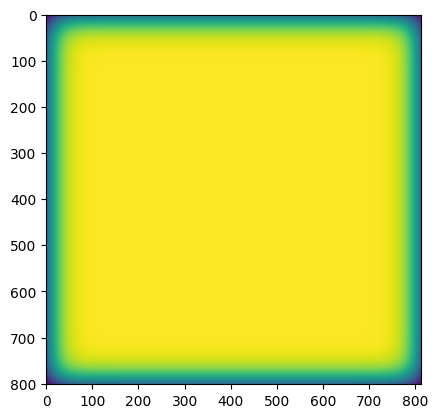

In [5]:
def butterworth_window(shape, cutoff_radius_ftr, order):
    """
    Generate a 2D Butterworth window.
    
    Parameters:
    - shape: tuple of ints, the shape of the window (height, width).
    - cutoff_radius_ftr: float, the cutoff frequency as a fraction of the radius (0, 0.5].
    - order: int, the order of the Butterworth filter.
    
    Returns:
    - window: 2D numpy array, the Butterworth window.
    """
    assert len(shape) == 2, 'Shape must be a tuple of length 2 (height, width)'
    assert 0 < cutoff_radius_ftr <= 0.5, 'Cutoff frequency must be in the range (0, 0.5]'
    
    def butterworth_1d(length, cutoff_radius_ftr, order):
        n = np.arange(-np.floor(length / 2), length - np.floor(length / 2))
        return 1 / (1 + (n / (cutoff_radius_ftr * length))**(2 * order))
    
    window_y = butterworth_1d(shape[0], cutoff_radius_ftr, order)
    window_x = butterworth_1d(shape[1], cutoff_radius_ftr, order)
    
    window = np.outer(window_y, window_x)
    
    return window

buttworth_window = butterworth_window((model.image.shape[0], model.image.shape[1]), 0.5, 10)
plt.imshow(buttworth_window)

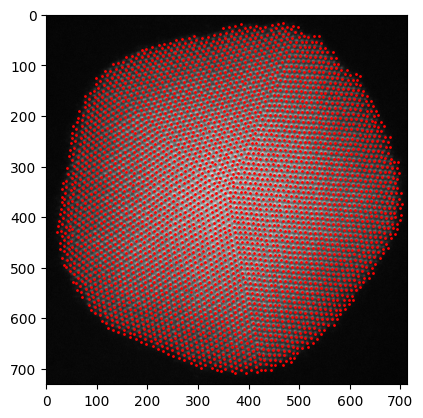

In [ ]:
model.plot('original')

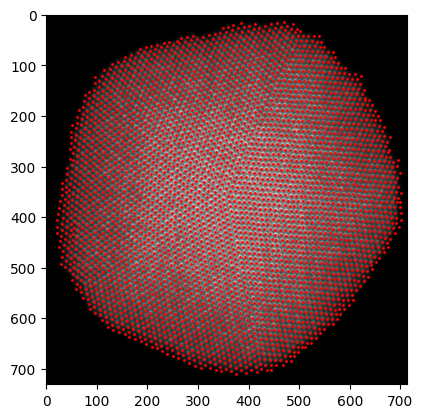

In [ ]:
model.plot('prediction')

In [16]:
%matplotlib qt5
input_coordinates = model.coordinates
output_coordinates = outputStatSTEM['coordinates']/dx
plt.scatter(input_coordinates[:,0], input_coordinates[:,1], c='r',s=100,alpha=0.5)
plt.scatter(model.pos_x/dx, model.pos_y/dx, c='b', marker='x')
plt.scatter(output_coordinates[:,1], output_coordinates[:,0], c='y', marker='x')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(['input coordinates', 'pyStatSTEM refined coordinates', 'StatSTEM refined coordinates'])


In [7]:
outputStatSTEM.keys()

dict_keys(['ICL', 'AIC', 'GIC', 'AWE', 'BIC', 'CLC', 'AtomCounts', 'Volumes', 'coordinates', 'numberofAtoms', 'estimatedLocations', 'estimatedWidth', 'estimatedProportions', 'N', 'offset', 'estimatedDistributions'])

/tmp/ipykernel_427266/20771798.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)


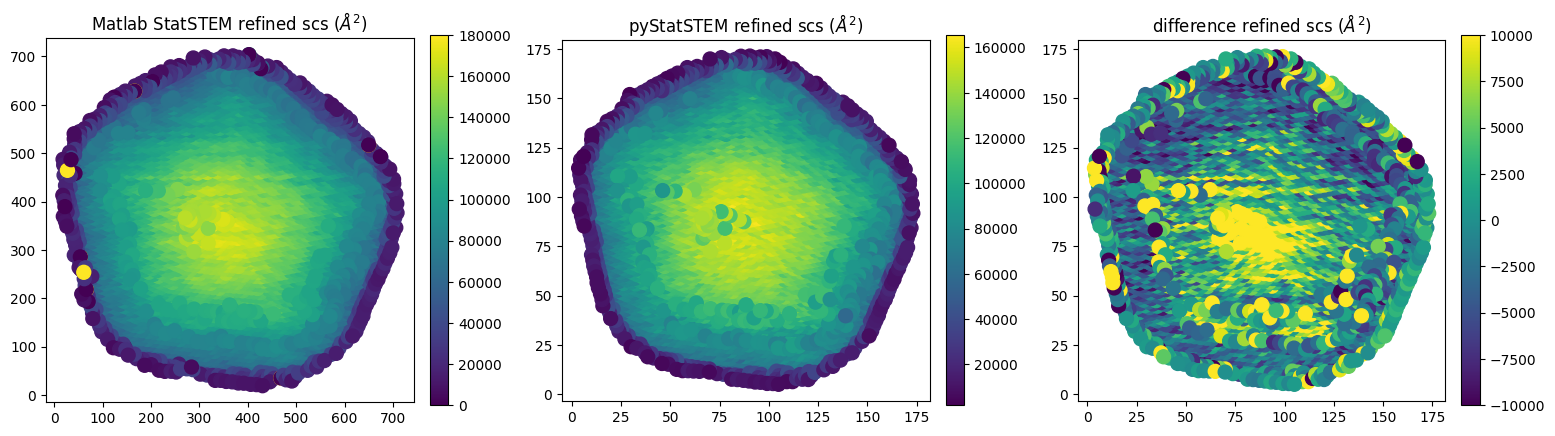

In [16]:
plt.subplots(figsize=(15,5))
plt.subplot(1,3,1)
volumes = outputStatSTEM['volumes']
# coord_statstem = outputStatSTEM['coordinates']
coord_statstem = np.array([outputStatSTEM['BetaX']/dx, outputStatSTEM['BetaY']/dx]).T
im = plt.scatter(coord_statstem[:,1], coord_statstem[:,0], c=volumes, s=100)
plt.clim(0,1.8e5)
# make aspect ratio equal
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.title(r'Matlab StatSTEM refined scs ($\AA^2$)')
plt.tight_layout()
plt.subplot(1,3,2)
refined_coordinates = model.pos_x, model.pos_y
volume = model.volume
im = plt.scatter(refined_coordinates[0], refined_coordinates[1], c=volume, s=100)
# make aspect ratio equal
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.title(r'pyStatSTEM refined scs ($\AA^2$)')
plt.tight_layout()
plt.subplot(1,3,3)
im = plt.scatter(model.pos_x, model.pos_y, c=outputStatSTEM['volumes']-model.volume, s=100)
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.title(r'difference refined scs ($\AA^2$)')
plt.clim(-1e4,1e4)

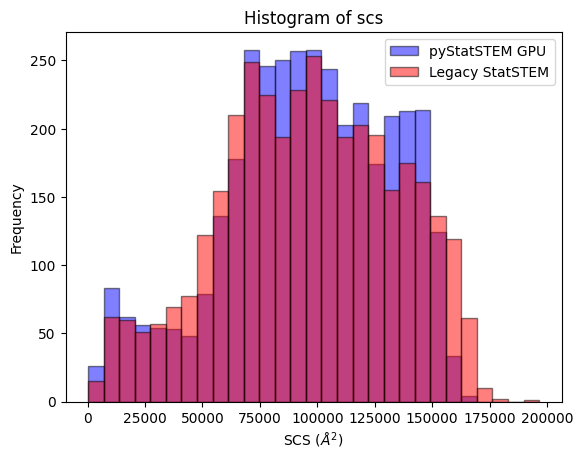

In [17]:
data1= model.volume

data2= outputStatSTEM['volumes']
mask = (data2>0) & (data2<1e6)
data2 = data2[mask]
combined_data = np.concatenate((data1, data2))
min_bin = combined_data.min()
max_bin = combined_data.max()

# Define the bin edges so that both histograms will use the same bins
bins = np.linspace(min_bin, max_bin, 30)

plt.hist(data1, bins=bins, edgecolor='black',label='pyStatSTEM GPU',color='blue',alpha=0.5)
plt.hist(data2, bins=bins, edgecolor='black',color='red',alpha=0.5, label='Legacy StatSTEM')
# ground_truth = np.sum(image)*dx**2/64
#plot ground truth as a vertical line in red 
# plt.plot([ground_truth,ground_truth],[0,20],'r--',label='Ground truth')
plt.title('Histogram of scs')
plt.xlabel(r'SCS ($\AA^2$)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from scipy.ndimage import uniform_filter, gaussian_filter

def ssim(img1, img2, C1=6.5025, C2=58.5225):
    """
    Calculate the SSIM (Structural Similarity Index) between two images.
    
    Parameters:
    - img1, img2: Numpy arrays of the same dimension.
    - C1, C2: Variables to stabilize the division with weak denominator.
    
    Returns:
    - The SSIM index.
    """
    
    # Ensure the input images have the same dimensions
    assert img1.shape == img2.shape, "Input images must have the same dimensions"
    
    # Mean of the images
    mu1 = uniform_filter(img1, size=11)
    mu2 = uniform_filter(img2, size=11)
    
    # Variance of the images
    sigma1_sq = uniform_filter(img1 * img1, size=11) - mu1 * mu1
    sigma2_sq = uniform_filter(img2 * img2, size=11) - mu2 * mu2
    
    # Covariance between the images
    sigma12 = uniform_filter(img1 * img2, size=11) - mu1 * mu2
    
    # Calculate the SSIM
    ssim_map = ((2 * mu1 * mu2 + C1) * (2 * sigma12 + C2)) / ((mu1**2 + mu2**2 + C1) * (sigma1_sq + sigma2_sq + C2))
    return ssim_map.mean()

ssim(model.image , outputStatSTEM['model']),ssim(model.image , model.prediction)

(0.5965350140279811, 0.5903602)

In [ ]:
diff.std(), np.abs(diff).mean()

(Array(2263.3901, dtype=float32), 1607.2849)

(100.36383310712141, 238.34782537881537)

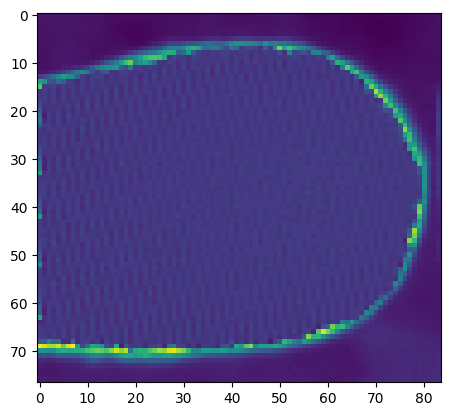

In [ ]:
diff = model.image - model.prediction
diff = model.image - outputStatSTEM['model']
plt.imshow(diff)
# binning the data into half the size
bin_size = 10
arr = diff
arr = arr[:arr.shape[0]//bin_size*bin_size,:arr.shape[1]//bin_size*bin_size]
arr = arr.reshape(arr.shape[0]//bin_size,bin_size,arr.shape[1]//bin_size,bin_size).mean(axis=1).mean(axis=2)
plt.imshow(arr)
arr.std() + np.abs(arr).mean(), diff.std() +np.abs(diff).mean()
# get the L1 loss of the arr and diff
np.abs(arr).mean(), np.abs(diff).mean()
# arr.std() , diff.std() 


In [ ]:
model.ratio

array(0.03641658, dtype=float32)

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(2,3,1)
im=plt.imshow(model.image)
plt.colorbar(im,fraction=0.046, pad=0.04)
# plt.clim(0,0.009)
plt.tight_layout()
plt.title('Input Image')
plt.subplot(2,3,2)
im=plt.imshow(model.prediction)
plt.colorbar(im,fraction=0.046, pad=0.04)
# plt.clim(0,0.009)
plt.tight_layout()
plt.title('pyStatSTEM Model')
plt.subplot(2,3,3)
im=plt.imshow(model.prediction-model.image)
plt.colorbar(im,fraction=0.046, pad=0.04)
# plt.clim(-0.001,0)
plt.tight_layout()
plt.title('Residuals')


plt.subplot(2,3,5)
im=plt.imshow(outputStatSTEM['model'])
plt.colorbar(im,fraction=0.046, pad=0.04)
# plt.clim(0,0.009)
plt.tight_layout()
plt.title('Legacy StatSTEM Model')
plt.subplot(2,3,6)
im=plt.imshow(outputStatSTEM['model']-model.image)
plt.colorbar(im,fraction=0.046, pad=0.04)
# plt.clim(-0.001,0)
plt.tight_layout()
plt.title('Residuals')

Text(0.5, 1.0, 'Residuals')

In [ ]:
model.model.mean()

AttributeError: 'str' object has no attribute 'mean'

Iteration 0: loss = 0.031092
Iteration 10: loss = 0.013476
Iteration 20: loss = 0.006091
Iteration 30: loss = 0.002537
Iteration 40: loss = 0.001279
Iteration 50: loss = 0.001070
Iteration 60: loss = 0.001006
Iteration 70: loss = 0.000911
Iteration 80: loss = 0.000823
Iteration 90: loss = 0.000750
Iteration 100: loss = 0.000680
Iteration 110: loss = 0.000610
Iteration 120: loss = 0.000542
Iteration 130: loss = 0.000475
Iteration 140: loss = 0.000411
Iteration 150: loss = 0.000350
Iteration 160: loss = 0.000293
Iteration 170: loss = 0.000241
Iteration 180: loss = 0.000194
Iteration 190: loss = 0.000153
Iteration 200: loss = 0.000118
Iteration 210: loss = 0.000090
Iteration 220: loss = 0.000067
Iteration 230: loss = 0.000050
Iteration 240: loss = 0.000037
Iteration 250: loss = 0.000028
Iteration 260: loss = 0.000022
Iteration 270: loss = 0.000018
Iteration 280: loss = 0.000015
Iteration 290: loss = 0.000013
Iteration 300: loss = 0.000012
Iteration 310: loss = 0.000011
Iteration 320: loss

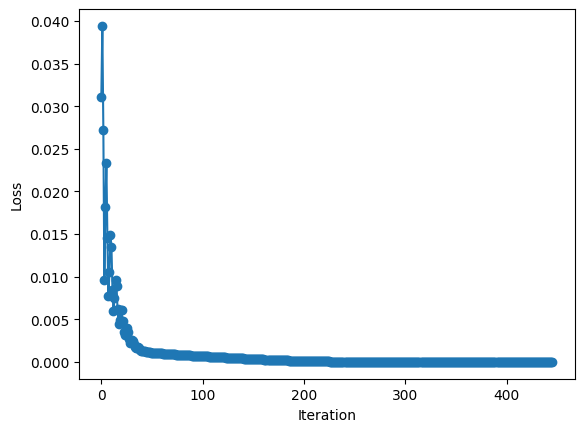

In [ ]:
model.fit_background=False
model.same_width =False
model.optimize(lr=0.005,tol=1e-8,max_iter=10000, optimizer='adam',model='voigt')

In [ ]:
%matplotlib qt5
plt.scatter(model.pos_y,model.pos_x,label='pyTorch') 
# plt.scatter(input_coordinates[:,0]*dx,input_coordinates[:,1]*dx,label='Matlab StatSTEM input')
plt.scatter(output_coordinates[:,0]*dx,output_coordinates[:,1]*dx,label='Matlab StatSTEM output')
# plt.scatter(f.coordinate[0][1]*dx,f.coordinate[0][0]*dx,label='pyStatSTEM')
plt.legend()

In [ ]:
model.background

Parameter containing:
tensor(0.0002, device='cuda:0', requires_grad=True)

In [ ]:
model.coordinates.T.shape

(2, 81)

Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 34
         Function evaluations: 68


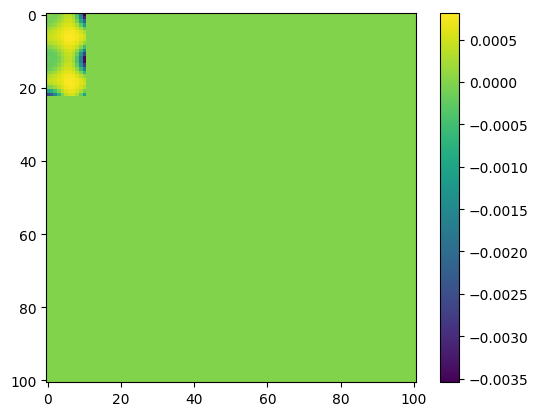

2
step size: 0.5
0
step size: 0.25
0
step size: 0.125
0
step size: 0.0625
0
step size: 0.03125


In [ ]:
from pyStatSTEM.classes import ImageProcess

f=ImageProcess(image)
f.coordinate.append(model.coordinates.T[:,[1,0]]/dx)
# f.find_peak(th_dist=15,th_inten=0.07)
f.fit_gaussian()

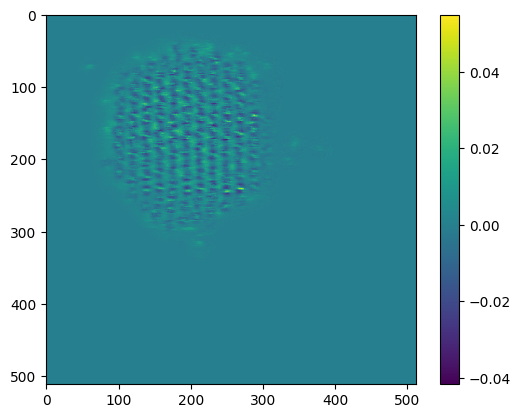

In [ ]:
plt.imshow(f.image[0]-f.image_fitted[0])
plt.colorbar()

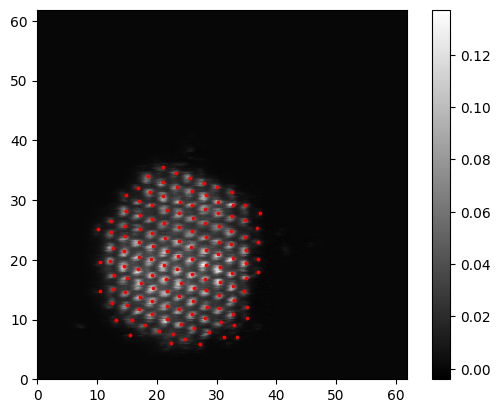

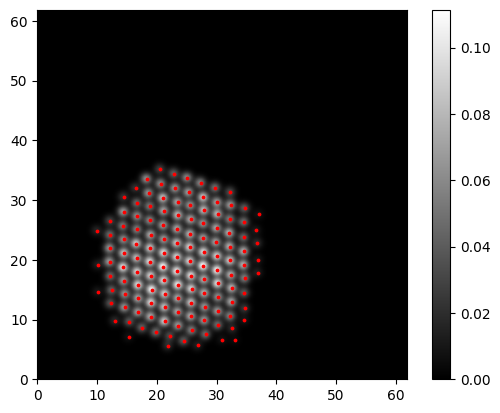

In [ ]:
import pyStatSTEM
import matplotlib.pyplot as plt
import numpy as np

legacyStatSTEM = pyStatSTEM.io.read_legacyInputStatSTEM('Example_PtIr.mat')
inputStatSTEM = legacyStatSTEM['input']
outputStatSTEM = legacyStatSTEM['output']
# atomcountsStatSTEM = legacyStatSTEM['atomcounting'] # not used

fig = pyStatSTEM.utils.plot_image(inputStatSTEM['obs'], inputStatSTEM['Xaxis'], inputStatSTEM['Yaxis'])
plt.scatter(inputStatSTEM['coordinates'][:,0], inputStatSTEM['coordinates'][:,1], c='r', s=3)
plt.show()

fig2 = pyStatSTEM.utils.plot_image(outputStatSTEM['model'], inputStatSTEM['Xaxis'], inputStatSTEM['Yaxis'])
plt.scatter(outputStatSTEM['coordinates'][:,0], outputStatSTEM['coordinates'][:,1], c='r', s=3)
plt.show()

### Read generic image file formats into numpy arrays

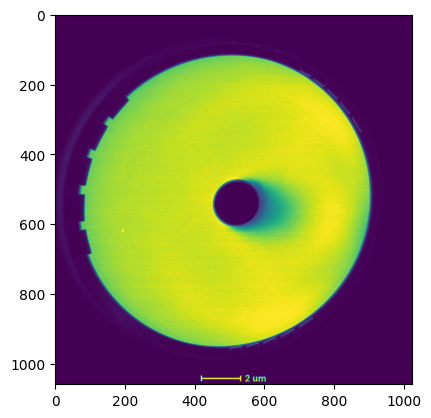

In [ ]:
img = pyStatSTEM.io.read_image('det.tif')
plt.imshow(img)
plt.show()

### Reading data from delimited text files

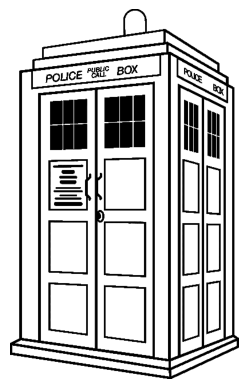

In [ ]:
img = pyStatSTEM.io.read_delimited_text('img.txt')
plt.imshow(-img, cmap='gray')
plt.axis('off')
plt.show()

### Testing preliminary class object instatiations


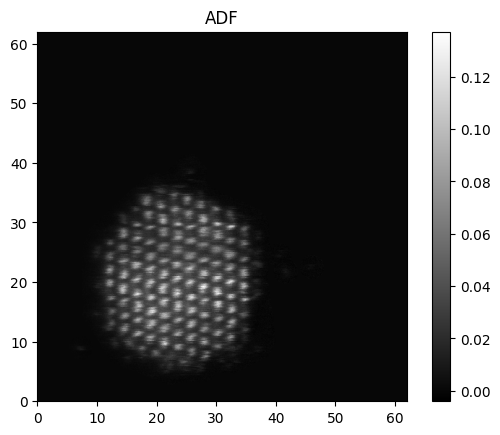

In [ ]:
# Create pyStatSTEM.Image object
im_adf = pyStatSTEM.Image(inputStatSTEM['obs'], 'ADF', inputStatSTEM['dx'])
im_adf.plot()


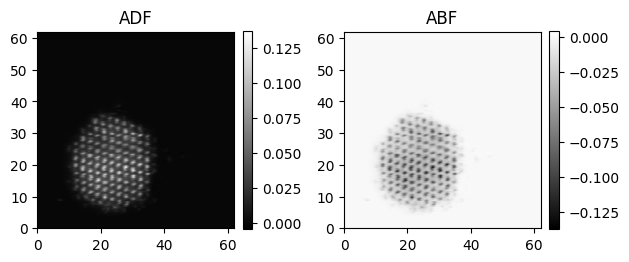

In [ ]:
from pyStatSTEM.preprocessing import invert_image

# Create new pyStatSTEM.Image object
im_abf = pyStatSTEM.Image(invert_image(inputStatSTEM['obs']),'ABF', inputStatSTEM['dx'])

# Create new pyStatSTEM.Experiment object
ex = pyStatSTEM.Experiment([im_adf, im_abf])
ex.plot()

In [ ]:
from tests import test_GMM
test_GMM.test_GMM(path_to_data="Example_PtIr.mat",plot=True)

ImportError: cannot import name 'test_GMM' from 'tests' (/home/zzhang/miniconda3/envs/hyperspy/lib/python3.10/site-packages/tests/__init__.py)